# Beyond Word Embeddings

## Doc2Vec

In [46]:
from keras.preprocessing.text import text_to_word_sequence
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.test.utils import get_tmpfile
from glob import glob
import gensim

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd
import pprint

In [2]:
corpus = glob("corpus/*txt*")

In [52]:
#preprocessing the texts and training the model
data = [text_to_word_sequence(open(text).read(), lower=False ) for text in corpus]
docs = [TaggedDocument(doc, [i]) for i, doc in enumerate(data)]
model = Doc2Vec(docs, vector_size=100, window=4, min_count=1, workers=4, layer_size=16)

## Similar Plays

In [91]:
def get_similar_plays(corpus, model, name_of_play):
    idx_play = corpus.index(name_of_play)
    sim_text =[((corpus[similar[0]][7:-4]).split(".txt.") ,similar[1]) for similar in model.docvecs.most_similar(idx_play, topn=10)]
    return sim_text

In [92]:
print("Early Shakespeare: Romeo and Juliet")
pprint.pprint(get_similar_plays(corpus,model, 'corpus\\romeo_juliet.txt.E-Shakespeare.tok'))
print(" ")
print("Late Shakespeare: Tempest")
pprint.pprint(get_similar_plays(corpus,model, 'corpus\\Tempest.txt.L-Shakespeare.tok'))
print(" ")

print("Marlowe: Massacare at Paris")
pprint.pprint(get_similar_plays(corpus,model, 'corpus\\massacare at paris.txt.Marlowe.tok'))

Early Shakespeare: Romeo and Juliet
[(['two_gentlemen', 'E-Shakespeare'], 0.9591408371925354),
 (['Love_Labours_lost', 'E-Shakespeare'], 0.9555893540382385),
 (['comedy_errors', 'E-Shakespeare'], 0.9545547962188721),
 (['henryivPart1', 'E-Shakespeare'], 0.9503582715988159),
 (['midsummer', 'E-Shakespeare'], 0.9495022892951965),
 (['King John', 'E-Shakespeare'], 0.9487946033477783),
 (['Tempest', 'L-Shakespeare'], 0.9487026929855347),
 (['henryivPart2', 'E-Shakespeare'], 0.9474780559539795),
 (['twelfth_night', 'E-Shakespeare'], 0.9466590285301208),
 (['taming_shrew', 'E-Shakespeare'], 0.9461884498596191)]
 
Late Shakespeare: Tempest
[(['midsummer', 'E-Shakespeare'], 0.9624403119087219),
 (['King John', 'E-Shakespeare'], 0.9620540142059326),
 (['winters_tale', 'L-Shakespeare'], 0.9584811925888062),
 (['Othello', 'L-Shakespeare'], 0.9526054859161377),
 (['Lear', 'L-Shakespeare'], 0.951095461845398),
 (['romeo_juliet', 'E-Shakespeare'], 0.9487026929855347),
 (['asyoulikeit', 'E-Shakespear

## Plotting the Corpus

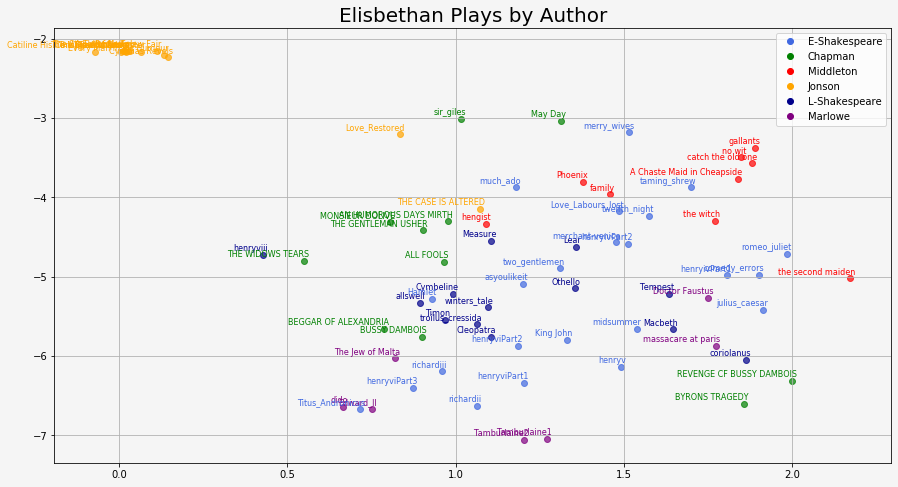

In [72]:
doc_names = [corps[7:] for corps in corpus]
doc_embeddings = [model.docvecs[idx] for idx, _ in enumerate(corpus)]
authors_colours={"E-Shakespeare": "royalblue", "Chapman" :"green", "Middleton":"red", "Jonson": "orange", "L-Shakespeare": "darkblue", "Marlowe": "purple"}
list_colours=[]
drama_colours= {}
for idx, doc_name in enumerate(doc_names):
    drama_colours[doc_name]=[]
    for author in authors_colours:
        if author in doc_name:
            list_colours.append(authors_colours[author])
            drama_colours[doc_name]=authors_colours[author]

tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500)
fitted_tsne = tsne.fit_transform(doc_embeddings)

x_values= [value[0] for value in fitted_tsne]
y_values= [value[1] for value in fitted_tsne]
annotate_drama= [doc_name.split(".txt")[0] for doc_name in doc_names]

fig = plt.figure(figsize=(15,8), facecolor='whitesmoke')
ax = fig.add_subplot(1, 1, 1)
ax.set_facecolor('whitesmoke')
plt.grid(True)
for idx, drama in enumerate(doc_names):
    plt.scatter(x_values[idx],y_values[idx], alpha=0.7, c=drama_colours[drama])
    plt.annotate(annotate_drama[idx], (x_values[idx],y_values[idx]), xytext=(5, 2), color=drama_colours[drama],
                     textcoords='offset points', ha='right', va='bottom', size=8)

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in authors_colours.values()]
plt.legend(markers, authors_colours.keys(), numpoints=1)
plt.title("Elisbethan Plays by Author", size=20)

plt.savefig("Doc2Vec_Elisabethan Corpus.png", format='png', dpi=150)
plt.show()

# Ted Talks

In [73]:
#Concatenating two dfs:one contains informaton about each tedtalk the other the transcripts
df_TT = pd.read_csv("ted_main.csv")
transcripts_TT = pd.read_csv("transcripts.csv")

df_TT["transcript"] = [0 for row in range(df_TT.shape[0])]
for _, row in transcripts_TT.iterrows(): 
    url = df_TT["url"] == row["url"]
    df_TT.loc[url, "transcript"]= row["transcript"]
df_TT2 = df_TT.loc[df_TT["transcript"] != 0]

print(df_TT2.shape)
df_TT2.head()

(2464, 18)


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views,transcript
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,1140825600,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110,Good morning. How are you?(Laughter)It's been ...
1,265,With the same humor and humanity he exuded in ...,977,TED2006,1140825600,43,Al Gore,Al Gore: Averting the climate crisis,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520,"Thank you so much, Chris. And it's truly a gre..."
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,1140739200,26,David Pogue,David Pogue: Simplicity sells,1,1151367060,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292,"(Music: ""The Sound of Silence,"" Simon & Garfun..."
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,1140912000,35,Majora Carter,Majora Carter: Greening the ghetto,1,1151367060,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550,If you're here today — and I'm very happy that...
4,593,You've never seen data presented like this. Wi...,1190,TED2006,1140566400,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,1151440680,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869,"About 10 years ago, I took on the task to teac..."


In [74]:
#prepocessing the talks and training new model
preprocessed_TT = []
for idx, row in df_TT2.iterrows():
    preprocessed_TT.append(text_to_word_sequence(row["transcript"], lower=True))
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(preprocessed_TT)]
model_TT = Doc2Vec(documents, vector_size=100, window=4, min_count=1, workers=4)

C:\Users\ninah\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


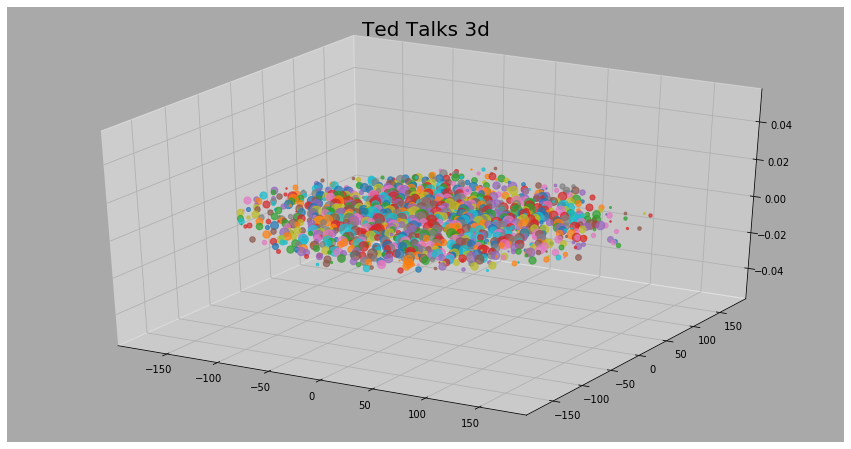

In [75]:
labels_TT = list(df_TT2["title"])
embeddings_TT = [model_TT.docvecs[idx] for idx, _ in enumerate(labels_TT)]

tsne = TSNE(perplexity=50, n_components=3, init='pca', n_iter=2500)
fitted_tsne = tsne.fit_transform(embeddings_TT)
x_values= [value[0] for value in fitted_tsne]
y_values= [value[1] for value in fitted_tsne]
z_values= [value[2] for value in fitted_tsne]

fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(1, 1, 1, projection="3d").set_facecolor('darkgrey')

plt.grid(True)
for idx, talk in enumerate(labels_TT):
    plt.scatter(x_values[idx],y_values[idx],z_values[idx], alpha=0.7)
plt.title("Ted Talks 3d", size=20)
plt.savefig("Ted Talks 3d.png", format='png', dpi=150)

plt.show()

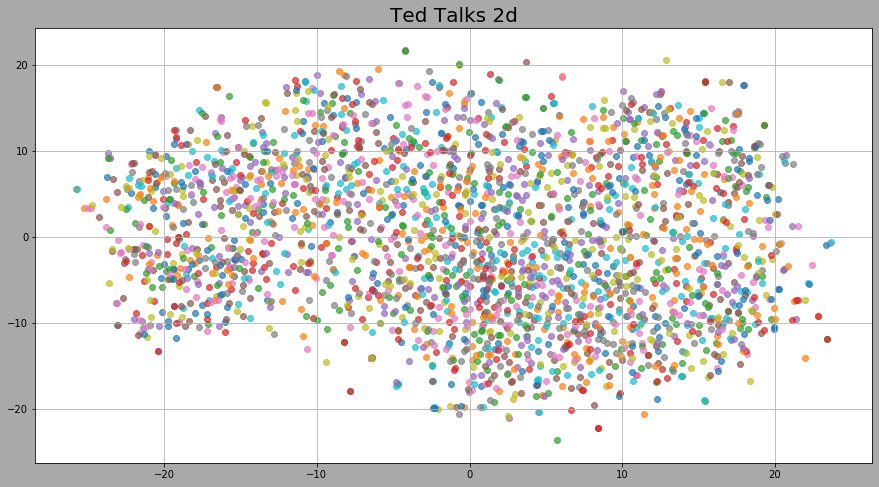

In [77]:
tsne = TSNE(perplexity=50, n_components=2, init='pca', n_iter=2500)
fitted_tsne = tsne.fit_transform(embeddings_TT)
x_values= [value[0] for value in fitted_tsne]
y_values= [value[1] for value in fitted_tsne]

fig = plt.figure(figsize=(15,8))
ax = fig.set_facecolor('darkgrey')

plt.grid(True)
for idx, talk in enumerate(labels_TT):
    plt.scatter(x_values[idx],y_values[idx], alpha=0.7)
plt.title("Ted Talks 2d", size=20)
plt.savefig("Ted Talks 2d.png", format='png', dpi=150)

plt.show()

## Finding Similar TedTalks

In [166]:
get_high_similarity = {}
for idx,similar in enumerate(documents):
    sim_TT_0 = [(sim[0],sim[1]) for sim in model_TT.docvecs.most_similar(documents[idx][1], topn=6)]
    for sim_TT in sim_TT_0:
        if sim_TT[1]>0.91:
            get_high_similarity[idx] = [sim2[0] for sim2 in sim_TT_0]

high_similar_docs={}
for key in get_high_similarity:
    for values in get_high_similarity[key]:
        if values not in high_similar_docs:
            high_similar_docs[values] = key


In [248]:
get_low_similarity = {}
for idx,similar in enumerate(documents):
    sim_TT_0 = [(sim[0],sim[1]) for sim in model_TT.docvecs.most_similar(documents[idx][1], topn=6)]
    for sim_TT in sim_TT_0:
        if sim_TT[1]<0.632:
            get_low_similarity[idx] = [sim2[0] for sim2 in sim_TT_0]

low_similar_docs={}
for key in get_low_similarity:
    for values in get_low_similarity[key]:
        if values not in low_similar_docs:
            low_similar_docs[values] = key


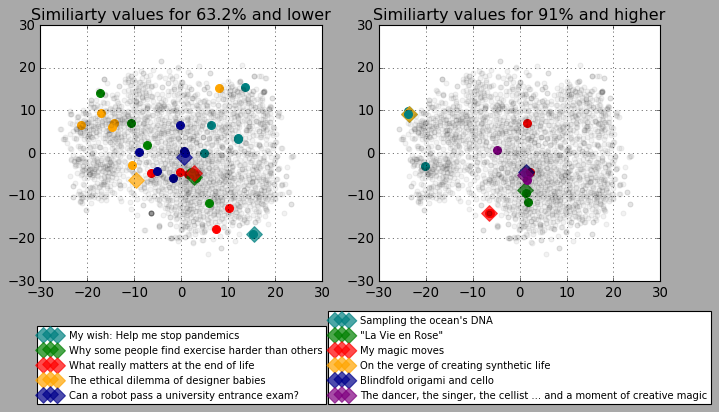

In [236]:
x_values= [value[0] for value in fitted_tsne]
y_values= [value[1] for value in fitted_tsne]


colours=["teal", "green", "red",  "orange",  "darkblue", "purple"]
colourmap_high={}

for idx_c, key in enumerate(get_high_similarity):
    colourmap_high[key] = colours[idx_c]

colourmap_low = {}
for idx_c, key in enumerate(get_low_similarity):
    colourmap_low[key] = colours[idx_c]

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,4))
fig.set_facecolor('darkgrey')
plt.style.use('classic')

for idx, talk in enumerate(labels_TT):
    ax1.grid(True)
    if idx not in get_low_similarity and idx not in low_similar_docs:
        ax1.scatter(x_values[idx],y_values[idx], color= "k", alpha=0.05, s=20)
    elif idx in get_low_similarity:
        ax1.scatter(x_values[idx],y_values[idx], color= colourmap_low[idx], marker="D", alpha=0.7, s=100 ,label=df_TT2.iloc[idx]["title"])
    elif idx in low_similar_docs:
        ax1.scatter(x_values[idx],y_values[idx], color= colourmap_low[low_similar_docs[idx]], s=50)
ax1.set_title('Similiarty values for 63.2% and lower')
ax1.legend(loc="lower center", fontsize=9, bbox_to_anchor=(0.5, -0.5))

for idx, talk in enumerate(labels_TT):
    ax2.grid(True)
    if idx not in get_high_similarity and idx not in high_similar_docs:
        ax2.scatter(x_values[idx],y_values[idx], color= "k", alpha=0.05, s=20)
    elif idx in get_high_similarity:
        ax2.scatter(x_values[idx],y_values[idx], color= colourmap_high[idx], marker="D", alpha=0.7, s=100, label=df_TT2.iloc[idx]["title"])
    elif idx in similiar_docs:
        ax2.scatter(x_values[idx],y_values[idx], color= colourmap_high[high_similar_docs[idx]], s=50)

ax2.set_title('Similiarty values for 91% and higher')
ax2.legend(loc="lower center", fontsize=9, bbox_to_anchor=(0.5, -0.5))

plt.savefig("TedTalksSimilarity 2d.png", format='png', dpi=150)
      
plt.show()

In [245]:
for key in get_high_similarity: 
    print(df_TT2.iloc[key]["title"], "has these tags:")
    print(df_TT2.iloc[key]["tags"])
    print("_______________________________________________________________________________________________________________")
    for value in get_high_similarity[key]:
        print("\u2022" , df_TT2.iloc[value]["title"])
        print(df_TT2.iloc[value]["tags"])
        
    print(" ")
    print(" ")

        

Sampling the ocean's DNA has these tags:
['DNA', 'biodiversity', 'biology', 'biotech', 'ecology', 'entrepreneur', 'genetics', 'invention', 'oceans', 'science', 'technology']
_______________________________________________________________________________________________________________
• On the verge of creating synthetic life
['alternative energy', 'creativity', 'energy', 'genetics', 'global issues', 'invention', 'science', 'technology']
• Watch me unveil "synthetic life"
['DNA', 'biology', 'business', 'genetics', 'life', 'science', 'technology']
• There might just be life on Mars
['Mars', 'Planets', 'exploration', 'extraterrestrial life', 'geology', 'life', 'science', 'solar system', 'technology', 'universe']
• Tracking ancient diseases using ... plaque
['TED Fellows', 'ancient world', 'anthropology', 'bacteria', 'biology', 'disease', 'evolution', 'food', 'genetics', 'health', 'history', 'innovation', 'medicine', 'paleontology', 'science']
• A map of the brain
['DNA', 'biotech', 'brai

In [247]:
for key in get_low_similarity: 
    print(df_TT2.iloc[key]["title"], "has these tags:")
    print(df_TT2.iloc[key]["tags"])
    print("_______________________________________________________________________________________________________________")
    for value in get_low_similarity[key]:
        print("\u2022" , df_TT2.iloc[value]["title"])
        print(df_TT2.iloc[value]["tags"])
        
    print(" ")
    print(" ")

        

My wish: Help me stop pandemics has these tags:
['TED Prize', 'collaboration', 'disease', 'ebola', 'global issues', 'health', 'science', 'technology']
_______________________________________________________________________________________________________________
• The power of herd immunity
['TED en Español', 'health', 'health care', 'illness', 'medicine', 'virus']
• What doctors don't know about the drugs they prescribe
['activism', 'cancer', 'corruption', 'data', 'health', 'health care', 'illness', 'medical research', 'medicine', 'pharmaceuticals', 'public health', 'science']
• A forensic anthropologist who brings closure for the "disappeared"
['TEDYouth', 'anthropology', 'forensics', 'global issues', 'war']
• Humanity vs. Ebola. How we could win a terrifying war
['TEDx', 'disease', 'ebola', 'health', 'public health', 'virus']
• The case for optimism
['climate change', 'culture', 'global issues', 'health', 'peace']
• Stephen Hawking's zero g flight
['business', 'flight', 'science', '

# Play or TedTalk 

In [99]:
data_new= data + preprocessed_TT
documents_new = [TaggedDocument(doc, [i]) for i, doc in enumerate(data_new)]
model_new = Doc2Vec(documents_new, window=4, min_count=1, workers=4)


In [100]:
label_drama=["Drama" for drama in range(len(data)) ]
label_TT =  ["TedTalk" for tedtalk in range(len(preprocessed_TT))]
label_new = label_drama + label_TT
embeddings_new = [model_new.docvecs[idx] for idx, _ in enumerate(label_new)]

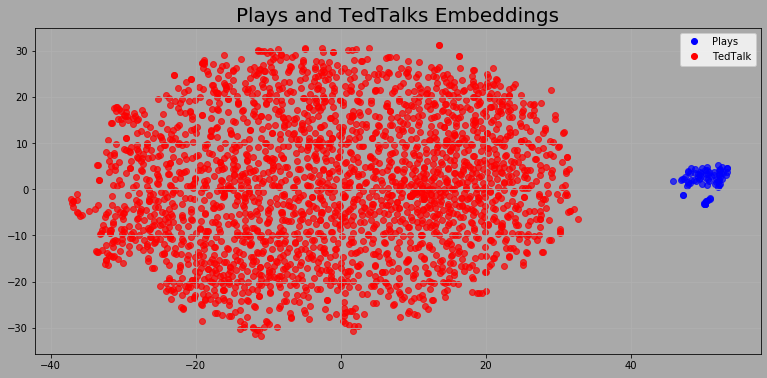

In [128]:
tsne_new = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500)
fitted_tsne_new = tsne_new.fit_transform(embeddings_new)
x_values_new= [value[0] for value in fitted_tsne_new]
y_values_new= [value[1] for value in fitted_tsne_new]


fig = plt.figure(figsize=(13,6), facecolor="darkgrey")
ax = fig.add_subplot(1,1,1)
ax.set_facecolor('darkgrey')
legend_colour={"Plays": "b", "TedTalk": "r"}
colour= ["b" for drama in range(len(data))] + ["r" for tedtalk in range(len(preprocessed_TT)) ]
plt.grid(True)
for idx, talk in enumerate(label_new):
    plt.scatter(x_values_new[idx],y_values_new[idx], alpha=0.7, label=label_new[idx], c=colour[idx])

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in legend_colour.values()]
plt.legend(markers, legend_colour.keys(), numpoints=1)
plt.title("Plays and TedTalks Embeddings", size=20)
plt.savefig("Plays and TedTalks.png", format='png', dpi=150)
plt.show()
